In [8]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.drop("customerID", axis = "columns", inplace = True )

In [ ]:
df.dtypes

In [19]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [20]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [22]:
df.iloc[488]['TotalCharges']

' '

In [24]:
df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [27]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15904\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [28]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
df1.TotalCharges.dtype


dtype('float64')

Text(0.5, 0, 'tenure')

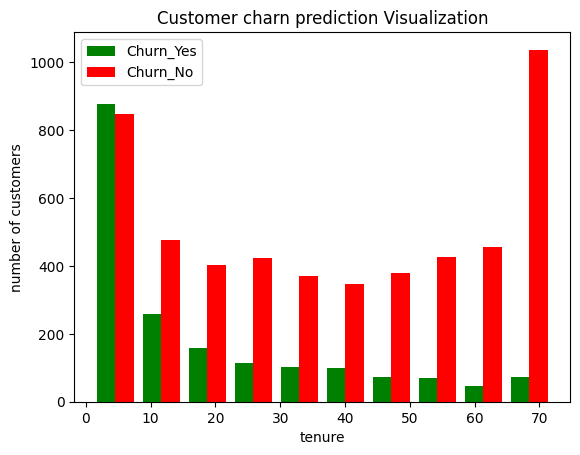

In [47]:
tenure_Churn_No = df1[df1.Churn == "No"].tenure
tenure_Churn_Yes = df1[df1.Churn == "Yes"].tenure

plt.hist([tenure_Churn_Yes,tenure_Churn_No], color = ["green","red"], label = ["Churn_Yes", "Churn_No"])
plt.legend()
plt.title("Customer charn prediction Visualization")
plt.ylabel("number of customers")
plt.xlabel("tenure")

Text(0.5, 0, 'MonthlyCharges')

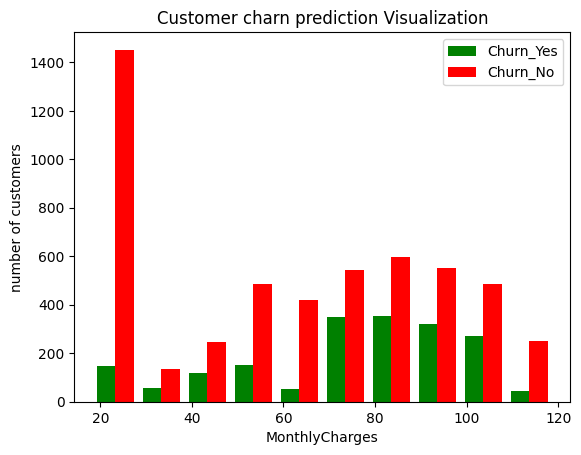

In [49]:
MonthlyCharges_Churn_No = df1[df1.Churn == "No"].MonthlyCharges
MonthlyCharges_Churn_Yes = df1[df1.Churn == "Yes"].MonthlyCharges

plt.hist([MonthlyCharges_Churn_Yes,MonthlyCharges_Churn_No], color = ["green","red"], label = ["Churn_Yes", "Churn_No"])
plt.legend()
plt.title("Customer charn prediction Visualization")
plt.ylabel("number of customers")
plt.xlabel("MonthlyCharges")

In [55]:
def print_column_values(df):
    for column in df:
         if df[column].dtypes == "object":
             print(f'{column} : {df[column].unique()}')

In [56]:
print_column_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [124]:
df1.InternetService.replace("0" , "No", inplace = True)
df1.Partner  = df.Partner 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15904\1268574494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.InternetService.replace("0" , "No", inplace = True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15904\1268574494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Partner  = df.Partner


In [125]:
print_column_values(df1)

Partner : ['Yes' 'No']
Dependents : ['0' '1']
PhoneService : ['0' '1']
MultipleLines : ['0' '1']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['0' '1']
OnlineBackup : ['1' '0']
DeviceProtection : ['0' '1']
TechSupport : ['0' '1']
StreamingTV : ['0' '1']
StreamingMovies : ['0' '1']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['1' '0']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['0' '1']


In [127]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': int(1),'No': int(0)},inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15904\1685994479.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': int(1),'No': int(0)},inplace=True)


In [128]:
print_column_values(df1)

Dependents : ['0' '1']
PhoneService : ['0' '1']
MultipleLines : ['0' '1']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['0' '1']
OnlineBackup : ['1' '0']
DeviceProtection : ['0' '1']
TechSupport : ['0' '1']
StreamingTV : ['0' '1']
StreamingMovies : ['0' '1']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['1' '0']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['0' '1']


In [130]:
df1.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [131]:
for column in df1:
    print(f'{column} : {df1[column].unique()}) ')

gender : [0 1]) 
SeniorCitizen : [0 1]) 
Partner : [1 0]) 
Dependents : ['0' '1']) 
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]) 
PhoneService : ['0' '1']) 
MultipleLines : ['0' '1']) 
InternetService : ['DSL' 'Fiber optic' 'No']) 
OnlineSecurity : ['0' '1']) 
OnlineBackup : ['1' '0']) 
DeviceProtection : ['0' '1']) 
TechSupport : ['0' '1']) 
StreamingTV : ['0' '1']) 
StreamingMovies : ['0' '1']) 
Contract : ['Month-to-month' 'One year' 'Two year']) 
PaperlessBilling : ['1' '0']) 
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']) 
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]) 
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]) 
Churn : ['0' '1']) 


In [132]:
df1.gender .replace({'Male': 1,'Female': 0}, inplace = True)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15904\565651325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.gender .replace({'Male': 1,'Female': 0}, inplace = True)


In [133]:
print_column_values(df1)

Dependents : ['0' '1']
PhoneService : ['0' '1']
MultipleLines : ['0' '1']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['0' '1']
OnlineBackup : ['1' '0']
DeviceProtection : ['0' '1']
TechSupport : ['0' '1']
StreamingTV : ['0' '1']
StreamingMovies : ['0' '1']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['1' '0']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['0' '1']


In [134]:
df2 = pd.get_dummies(data = df1, columns= ['InternetService', "Contract", "PaymentMethod"])
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,False,True,False,True,False,False,False,False,True,False


In [135]:
for column in df2:
    print(f'{column} : {df2[column].unique()}')

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : ['0' '1']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['0' '1']
MultipleLines : ['0' '1']
OnlineSecurity : ['0' '1']
OnlineBackup : ['1' '0']
DeviceProtection : ['0' '1']
TechSupport : ['0' '1']
StreamingTV : ['0' '1']
StreamingMovies : ['0' '1']
PaperlessBilling : ['1' '0']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['0' '1']
InternetService_DSL : [ True False]
InternetService_Fiber optic : [False  True]
InternetService_No : [False  True]
Contract_Month-to-month : [ True False]
Contract_One year : [False  True]
Contract_Two year : [False  True]
PaymentMethod_Bank transfer (automatic) : [False  True]
PaymentMethod_Credit card (automa

In [136]:
df1.replace({True: 1,False: 0}, inplace = True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15904\3099443397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace({True: 1,False: 0}, inplace = True)


In [137]:
for column in df2:
    print(f'{column} : {df2[column].unique()}')

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : ['0' '1']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['0' '1']
MultipleLines : ['0' '1']
OnlineSecurity : ['0' '1']
OnlineBackup : ['1' '0']
DeviceProtection : ['0' '1']
TechSupport : ['0' '1']
StreamingTV : ['0' '1']
StreamingMovies : ['0' '1']
PaperlessBilling : ['1' '0']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['0' '1']
InternetService_DSL : [ True False]
InternetService_Fiber optic : [False  True]
InternetService_No : [False  True]
Contract_Month-to-month : [ True False]
Contract_One year : [False  True]
Contract_Two year : [False  True]
PaymentMethod_Bank transfer (automatic) : [False  True]
PaymentMethod_Credit card (automa

In [154]:
for col in df2:
    if df2[col].dtypes == 'object':
        df2[col] = df2[col].astype(int)

In [153]:
df2.dtypes

gender                                       int32
SeniorCitizen                                int64
Partner                                      int32
Dependents                                   int32
tenure                                       int64
PhoneService                                 int32
MultipleLines                                int32
OnlineSecurity                               int32
OnlineBackup                                 int32
DeviceProtection                             int32
TechSupport                                  int32
StreamingTV                                  int32
StreamingMovies                              int32
PaperlessBilling                             int32
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int32
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

In [161]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['tenure','MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()

df2[columns_to_scale] = scaler.fit_transform(df2[columns_to_scale])



In [162]:
for column in df2:
    print(f'{column} : {df2[column].unique()}')


gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [164]:
x = df2.drop("Churn", axis= "columns")
y = df2["Churn"]

In [165]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 5)

In [166]:
x_train.shape

(5625, 26)

In [167]:
x_test.shape

(1407, 26)

In [207]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation="relu"),
    keras.layers.Dense(15, activation="sigmoid"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer = "adam",
             loss = "binary_crossentropy",
             metrics = ["accuracy"])
model.fit(x_train, y_train, epochs = 200 )


Epoch 1/200
176/176 [==============================] - 1s 2ms/step - loss: 0.5579 - accuracy: 0.7259
Epoch 2/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4484 - accuracy: 0.7819
Epoch 3/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4265 - accuracy: 0.7973
Epoch 4/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4217 - accuracy: 0.8039
Epoch 5/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4192 - accuracy: 0.8030
Epoch 6/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4174 - accuracy: 0.8037
Epoch 7/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8036
Epoch 8/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4141 - accuracy: 0.8037
Epoch 9/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4132 - accuracy: 0.8046
Epoch 10/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4123 - accura

In [213]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4662 - accuracy: 0.7690


[0.4662434458732605, 0.7690120935440063]

In [214]:
y_p = model.predict(x_test)
print(y_p[:5])

44/44 [==============================] - 0s 1ms/step
[[0.4127957 ]
 [0.5859865 ]
 [0.00921829]
 [0.7993619 ]
 [0.44941708]]


In [215]:
y_pred =[]
for i in y_p:
    if i>= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
    

In [216]:
y_pred[:5]

[0, 1, 0, 1, 0]

In [217]:
print(y_test[:5])

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int32


In [218]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.81      0.88      0.84       999
           1       0.63      0.50      0.56       408

    accuracy                           0.77      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.76      0.77      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

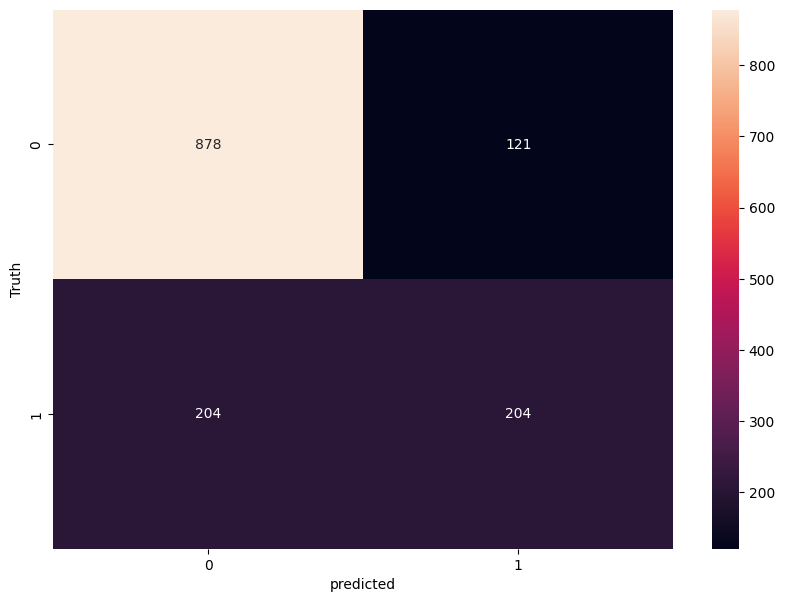

In [219]:
import seaborn as sn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("predicted")
plt.ylabel("Truth")

In [225]:
accuracy = (878+204)/(878+204+121+204)
round(accuracy,2)

0.77

In [228]:
precision_1 = 878/(878+204)    # precision of predicting 0
round(precision_1,2)

0.81

In [232]:
precision_2 = 204/(121+204)   # precision of predicting 1
round(precision_2,2)

0.63

In [235]:
# recall of 0
recall_0 = 878/(878+121)
round(recall_0,2)

0.88

In [236]:
# recall of 1
recall_1 = 204/(204+204)
round(recall_1,2)

0.5